In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats as st
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from scipy.stats import chi2_contingency
from collections import Counter
from math import sqrt

C:\Users\sofi\Anacondaa\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [131]:
df = pd.read_excel(r'C:\Users\sofi\Desktop\dataticket\newdataconnuee.xlsx')

In [22]:
df

,ID_ORDER,DATE-ADD,TIME-ADD,HOUR,SEASON,P_MONTH,P_WEEK,COVID,CONFINEMENT,CURFEW,...,AREA,CLASS,TOTAL_QUANTITY,TOTAL_QUANTITY_SEGMENTS,TOTAL_TICKET,TICKET_VALUE,TOTAL_PRICE,TOTAL_REDUCTION,TOTAL_REDUCTION_PERCENT,REDUCTION_SEGMENTS
0,15035121,2018-01-01,2018-01-01 17:55:10.000000,Late_afternoon,Winter,Start_of_Month,Start_of_Week,Pre-Covid,NON,NON,...,urbaine,C+,3,Entre 3 et 5 Pièces,179.80,Entre 100 et 200 DT,259.7,79.90,30.766269,entre 30% et 50%
1,16264861,2018-01-01,2018-01-01 16:37:29.000000,Late_afternoon,Winter,Start_of_Month,Start_of_Week,Pre-Covid,NON,NON,...,urbaine,B,1,1 pièce,179.90,Entre 100 et 200 DT,179.9,0.00,0.000000,inférieure à 30%
2,16264868,2018-01-01,2018-01-01 17:32:01.999999,Late_afternoon,Winter,Start_of_Month,Start_of_Week,Pre-Covid,NON,NON,...,urbaine,C+,1,1 pièce,99.90,Inférieur à 100 DT,99.9,0.00,0.000000,inférieure à 30%
3,35026888,2018-01-01,2018-01-01 16:03:50.999999,Late_afternoon,Winter,Start_of_Month,Start_of_Week,Pre-Covid,NON,NON,...,urbaine,C-,3,Entre 3 et 5 Pièces,159.80,Entre 100 et 200 DT,216.7,56.90,26.257499,inférieure à 30%
4,35026890,2018-01-01,2018-01-01 16:07:20.000000,Late_afternoon,Winter,Start_of_Month,Start_of_Week,Pre-Covid,NON,NON,...,urbaine,C-,2,2 pièces,101.35,Entre 100 et 200 DT,133.8,32.45,24.252616,inférieure à 30%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136929,680078170,2021-07-04,2021-07-04 18:40:37.000000,Evening,Summer,Start_of_Month,Week_End,Post-Covid,NO,de 22h à 5h,...,urbaine,B,1,1 pièce,41.93,Inférieur à 100 DT,59.9,17.97,30.000000,inférieure à 30%
136930,670067094,2021-07-04,2021-07-04 17:18:44.000000,Late_afternoon,Summer,Start_of_Month,Week_End,Post-Covid,NO,de 22h à 5h,...,urbaine,C+,2,2 pièces,92.26,Inférieur à 100 DT,131.8,39.54,30.000000,inférieure à 30%
136931,670067095,2021-07-04,2021-07-04 17:56:33.000000,Late_afternoon,Summer,Start_of_Month,Week_End,Post-Covid,NO,de 22h à 5h,...,urbaine,B,1,1 pièce,76.30,Inférieur à 100 DT,109.0,32.70,30.000000,inférieure à 30%
136932,14156247,2021-07-04,2021-07-04 15:07:42.000000,Late_afternoon,Summer,Start_of_Month,Week_End,Post-Covid,NO,de 22h à 5h,...,urbaine,C+,1,1 pièce,19.90,Inférieur à 100 DT,69.9,50.00,71.530758,plus que 50%


In [ ]:
u  = [i not in set(vc[vc>2].index) for i in df['ID_CUSTOMER']]
df = df[u]

In [21]:
vc = df['ID_CUSTOMER'].value_counts()
vc

BC0311747    573
BI12431      312
SA07190      225
S3002801     184
S2007112     163
            ... 
B0131131       1
S2000477       1
B1018293       1
S2037580       1
BI00365        1
Name: ID_CUSTOMER, Length: 27322, dtype: int64

In [25]:
vc[vc==1]

SB4500014    1
B1019326     1
SB4556026    1
S2005653     1
S2039336     1
            ..
B0131131     1
S2000477     1
B1018293     1
S2037580     1
BI00365      1
Name: ID_CUSTOMER, Length: 10363, dtype: int64

In [26]:
vc[vc==2]

BC0690232    2
B0132889     2
B1001358     2
SB0602902    2
B1000376     2
            ..
S2009351     2
B0127253     2
B0131526     2
BC0252377    2
S2033538     2
Name: ID_CUSTOMER, Length: 4825, dtype: int64

In [27]:
vc[vc==3]

S2004682      3
BC0442097     3
S2012233      3
B0123310      3
BC0310782     3
             ..
S2014399      3
S2012806      3
S3003948      3
BC01400019    3
BC0312051     3
Name: ID_CUSTOMER, Length: 2774, dtype: int64

In [28]:
vc[vc>5]

BC0311747    573
BI12431      312
SA07190      225
S3002801     184
S2007112     163
            ... 
SA03853        6
SB0600113      6
SB0540723      6
B1008159       6
B0128833       6
Name: ID_CUSTOMER, Length: 6333, dtype: int64

In [29]:
vc[vc>10]

BC0311747    573
BI12431      312
SA07190      225
S3002801     184
S2007112     163
            ... 
SB0602923     11
S2039380      11
BC0540016     11
BC0250164     11
B0136850      11
Name: ID_CUSTOMER, Length: 3071, dtype: int64

In [30]:
vc[vc>15]

BC0311747    573
BI12431      312
SA07190      225
S3002801     184
S2007112     163
            ... 
SB0240865     16
BC0442766     16
B3000598      16
BC0240004     16
S2034792      16
Name: ID_CUSTOMER, Length: 1768, dtype: int64

In [31]:
vc[vc>20]

BC0311747    573
BI12431      312
SA07190      225
S3002801     184
S2007112     163
            ... 
S2007146      21
S2019718      21
S2037997      21
S2027376      21
B0136830      21
Name: ID_CUSTOMER, Length: 1144, dtype: int64

In [32]:
vc[vc>25]

BC0311747    573
BI12431      312
SA07190      225
S3002801     184
S2007112     163
            ... 
S2009712      26
BC0250107     26
S2037492      26
BC0250070     26
S2010624      26
Name: ID_CUSTOMER, Length: 762, dtype: int64

In [33]:
vc[vc>30]

BC0311747    573
BI12431      312
SA07190      225
S3002801     184
S2007112     163
            ... 
B1011332      31
B0136385      31
S2033442      31
S2010475      31
BC0180495     31
Name: ID_CUSTOMER, Length: 529, dtype: int64

In [34]:
vc[vc>40]

BC0311747    573
BI12431      312
SA07190      225
S3002801     184
S2007112     163
            ... 
SB0660066     41
B1011047      41
S2011475      41
S3000883      41
BI00449       41
Name: ID_CUSTOMER, Length: 296, dtype: int64

In [35]:
vc[vc>50]

BC0311747    573
BI12431      312
SA07190      225
S3002801     184
S2007112     163
            ... 
B1010519      51
S2028971      51
SB0410033     51
B0137946      51
SB0540065     51
Name: ID_CUSTOMER, Length: 182, dtype: int64

In [132]:
vc = df['ID_CUSTOMER'].value_counts()
u  = [i not in set(vc[vc>40].index) for i in df['ID_CUSTOMER']]
df = df[u]

In [101]:
df

,ID_ORDER,DATE-ADD,TIME-ADD,HOUR,SEASON,P_MONTH,P_WEEK,COVID,CONFINEMENT,CURFEW,...,AREA,CLASS,TOTAL_QUANTITY,TOTAL_QUANTITY_SEGMENTS,TOTAL_TICKET,TICKET_VALUE,TOTAL_PRICE,TOTAL_REDUCTION,TOTAL_REDUCTION_PERCENT,REDUCTION_SEGMENTS
0,15035121,2018-01-01,2018-01-01 17:55:10.000000,Late_afternoon,Winter,Start_of_Month,Start_of_Week,Pre-Covid,NON,NON,...,urbaine,C+,3,Entre 3 et 5 Pièces,179.80,Entre 100 et 200 DT,259.7,79.90,30.766269,entre 30% et 50%
1,16264861,2018-01-01,2018-01-01 16:37:29.000000,Late_afternoon,Winter,Start_of_Month,Start_of_Week,Pre-Covid,NON,NON,...,urbaine,B,1,1 pièce,179.90,Entre 100 et 200 DT,179.9,0.00,0.000000,inférieure à 30%
2,16264868,2018-01-01,2018-01-01 17:32:01.999999,Late_afternoon,Winter,Start_of_Month,Start_of_Week,Pre-Covid,NON,NON,...,urbaine,C+,1,1 pièce,99.90,Inférieur à 100 DT,99.9,0.00,0.000000,inférieure à 30%
3,35026888,2018-01-01,2018-01-01 16:03:50.999999,Late_afternoon,Winter,Start_of_Month,Start_of_Week,Pre-Covid,NON,NON,...,urbaine,C-,3,Entre 3 et 5 Pièces,159.80,Entre 100 et 200 DT,216.7,56.90,26.257499,inférieure à 30%
4,35026890,2018-01-01,2018-01-01 16:07:20.000000,Late_afternoon,Winter,Start_of_Month,Start_of_Week,Pre-Covid,NON,NON,...,urbaine,C-,2,2 pièces,101.35,Entre 100 et 200 DT,133.8,32.45,24.252616,inférieure à 30%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136926,60032965,2021-07-04,2021-07-04 13:15:30.000000,Early_afternoon,Summer,Start_of_Month,Week_End,Post-Covid,NO,de 22h à 5h,...,urbaine,C+,1,1 pièce,125.30,Entre 100 et 200 DT,179.0,53.70,30.000000,inférieure à 30%
136928,62260727,2021-07-04,2021-07-04 13:02:45.000000,Early_afternoon,Summer,Start_of_Month,Week_End,Post-Covid,NO,de 22h à 5h,...,urbaine,C-,1,1 pièce,76.30,Inférieur à 100 DT,109.0,32.70,30.000000,inférieure à 30%
136930,670067094,2021-07-04,2021-07-04 17:18:44.000000,Late_afternoon,Summer,Start_of_Month,Week_End,Post-Covid,NO,de 22h à 5h,...,urbaine,C+,2,2 pièces,92.26,Inférieur à 100 DT,131.8,39.54,30.000000,inférieure à 30%
136931,670067095,2021-07-04,2021-07-04 17:56:33.000000,Late_afternoon,Summer,Start_of_Month,Week_End,Post-Covid,NO,de 22h à 5h,...,urbaine,B,1,1 pièce,76.30,Inférieur à 100 DT,109.0,32.70,30.000000,inférieure à 30%


In [38]:
df['gender'].value_counts()

femme    69249
homme    48053
Name: gender, dtype: int64

In [39]:
df=df.drop(['TOTAL_QUANTITY_SEGMENTS','TICKET_VALUE','REDUCTION_SEGMENTS'], axis=1)

In [103]:
df['REDUCTION_SEGMENTS'].value_counts(normalize=True)

entre 30% et 50%    0.449276
inférieure à 30%    0.298963
plus que 50%        0.251760
Name: REDUCTION_SEGMENTS, dtype: float64

In [128]:
dff=pd.crosstab(df.LOCATION,df.REDUCTION_SEGMENTS,normalize='index')

In [129]:
dff

REDUCTION_SEGMENTS,entre 30% et 50%,inférieure à 30%,plus que 50%
LOCATION,,,
Bizerte,0.452755,0.260451,0.286794
Blue Island Carrefour,0.408844,0.390294,0.200862
Blue Island Djerba,0.490909,0.297997,0.211094
Blue Island Manar,0.481790,0.339184,0.179026
Blue Island Menzah V,0.479388,0.339096,0.181516
Blue Island Menzah VI,0.520354,0.313274,0.166372
Blue Island Palmarium,0.426714,0.349882,0.223404
Blue Island Zephyr,0.488290,0.332553,0.179157
Central Park,0.424877,0.319376,0.255747


In [124]:
df['LOCATION'].value_counts()

Nabeul                   13696
Bizerte                   8731
El Kef                    8203
Kelibia                   7642
Monastir                  7640
Sousse                    6211
Kairouan                  6131
Blue Island Carrefour     5337
Ksar Hellal               5214
Sasio Djerba              4068
Mehdia                    3827
Sfax                      3694
Sasio Mseken              3630
Blue Island Djerba        3245
Sasio Geant               2850
Ennasr                    2448
Central Park              2436
Blue Island Manar         2279
Sasio Manar               2117
Sasio Menzah V            2113
Hammamet                  1913
Blue Island Zephyr        1708
Lafayette                 1597
Blue Island Menzah V      1504
Djerba                    1502
Sasio Manzah VI           1234
La Soukra                 1232
Lac 2                     1054
Sasio Palmarium            978
Blue Island Palmarium      846
Sasio Zephyr               706
Sasio Carrefour            700
Blue Isl

In [112]:
dff['pourcentage']=dff['REDUCTION_SEGMENTS']/

KeyError: 'REDUCTION_SEGMENTS'

In [97]:
df.isnull().sum()

ID_ORDER                       0
DATE-ADD                       0
TIME-ADD                       0
HOUR                           0
SEASON                         0
P_MONTH                        0
P_WEEK                         0
COVID                          0
CONFINEMENT                    0
CURFEW                         0
LOCATION                       0
ID_CUSTOMER                    0
lastname                       0
firstname                      0
CUSTOMER_DESCRIPTION       94037
gender                         0
score                          0
BIRTHDAY                       0
AGE                            0
AGE-SEGMENT                    0
TELEX                          0
EMAIL                      33972
ADRESS                      2415
POSTAL_CODE                    0
CITY                         692
REGION                         0
AREA                           0
CLASS                          0
TOTAL_QUANTITY                 0
TOTAL_QUANTITY_SEGMENTS        0
TOTAL_TICK

In [44]:
df2=(df.groupby('ID_CUSTOMER',as_index=False).agg({'AGE-SEGMENT':lambda x:x.mode(),'gender':lambda x:x.mode(),'CLASS':lambda x:x.mode(),'REGION':lambda x:x.mode(),'TOTAL_QUANTITY':'mean','TOTAL_TICKET':'mean','TOTAL_REDUCTION_PERCENT':'mean'}))

In [53]:
df2

,ID_CUSTOMER,AGE-SEGMENT,gender,CLASS,REGION,TOTAL_QUANTITY,TOTAL_TICKET,TOTAL_REDUCTION_PERCENT,TOTAL_QUANTITY_SEGMENTS,REDUCTION_SEGMENTS,TICKET_VALUE
0,1001337L,entre 30 et 40 ans,homme,B,Grand-Tunis,1.00,169.00000,0.000000,1 pièce,inférieure à 30%,Entre 100 et 200 DT
1,1001347L,plus que 40 ans,homme,B,Grand-Tunis,1.00,118.30000,30.000000,1 pièce,inférieure à 30%,Entre 100 et 200 DT
2,1001358L,plus que 40 ans,homme,A,Grand-Tunis,2.00,86.08000,47.817580,2 pièces,entre 30% et 50%,Inférieur à 100 DT
3,B0120003,entre 30 et 40 ans,homme,C+,nord-ouest,3.00,146.94625,31.204649,Entre 3 et 5 Pièces,entre 30% et 50%,Entre 100 et 200 DT
4,B0120005,entre 30 et 40 ans,homme,C-,nord-est,3.25,152.56500,31.461943,Entre 3 et 5 Pièces,entre 30% et 50%,Entre 100 et 200 DT
...,...,...,...,...,...,...,...,...,...,...,...
27021,SF000992,plus que 40 ans,femme,B,Grand-Tunis,2.00,111.84000,20.000000,2 pièces,inférieure à 30%,Entre 100 et 200 DT
27022,SF000998,plus que 40 ans,femme,C+,Grand-Tunis,2.00,33.91500,57.500000,2 pièces,plus que 50%,Inférieur à 100 DT
27023,SF000999,entre 30 et 40 ans,homme,B,Grand-Tunis,7.50,542.60500,36.189024,Entre 6 et 10 Pièces,entre 30% et 50%,Supérieur à 300 DT
27024,SÃÃÃ'_Ã',entre 30 et 40 ans,femme,B,Grand-Tunis,2.00,108.95000,43.893733,2 pièces,entre 30% et 50%,Entre 100 et 200 DT


In [46]:
max_QTE=df2['TOTAL_QUANTITY'].max()
cut_qte = ['1 pièce', "2 pièces", 'Entre 3 et 5 Pièces', 'Entre 6 et 10 Pièces', 'Plus que 10 Pièces']
cut_bins =[0.9,1.5, 2, 5, 10, max_QTE ]
df2['TOTAL_QUANTITY_SEGMENTS'] = pd.cut(df2['TOTAL_QUANTITY'], bins=cut_bins, labels = cut_qte)

In [47]:
max_red=df2['TOTAL_REDUCTION_PERCENT'].max()
cut_red = ['inférieure à 30%', "entre 30% et 50%", 'plus que 50%']
cut_bins =[-0.1,30, 50, max_red ]
df2['REDUCTION_SEGMENTS'] = pd.cut(df2['TOTAL_REDUCTION_PERCENT'], bins=cut_bins, labels = cut_red)

In [48]:
max_v=df2['TOTAL_TICKET'].max()
min_v=df2['TOTAL_TICKET'].min()

In [49]:
cut_ticket = ['Inférieur à 100 DT', 'Entre 100 et 200 DT', 'Entre 200 et 300 DT','Supérieur à 300 DT']
cut_bins =[min_v, 100,200,300,max_v ]
df2['TICKET_VALUE'] = pd.cut(df2['TOTAL_TICKET'], bins=cut_bins, labels = cut_ticket)

In [52]:
df2.isnull().sum()


ID_CUSTOMER                0
AGE-SEGMENT                0
gender                     0
CLASS                      0
REGION                     0
TOTAL_QUANTITY             0
TOTAL_TICKET               0
TOTAL_REDUCTION_PERCENT    0
TOTAL_QUANTITY_SEGMENTS    0
REDUCTION_SEGMENTS         0
TICKET_VALUE               0
dtype: int64

In [51]:
df2.dropna(inplace=True)

In [61]:
df3=pd.DataFrame(df2)

In [57]:
list_var = ['gender','AGE-SEGMENT','REGION','CLASS','REDUCTION_SEGMENTS','TICKET_VALUE']

In [133]:
df4=df[df['gender']=='femme']

In [74]:
df4

,Cluster,ID_ORDER,DATE-ADD,TIME-ADD,HOUR,SEASON,P_MONTH,P_WEEK,COVID,CONFINEMENT,...,AREA,CLASS,TOTAL_QUANTITY,TOTAL_QUANTITY_SEGMENTS,TOTAL_TICKET,TICKET_VALUE,TOTAL_PRICE,TOTAL_REDUCTION,TOTAL_REDUCTION_PERCENT,REDUCTION_SEGMENTS
1,0,16264861,2018-01-01,2018-01-01 16:37:29,Late_afternoon,Winter,Start_of_Month,Start_of_Week,Pre-Covid,NON,...,urbaine,B,1,1 pièce,179.90,Entre 100 et 200 DT,179.9,0.00,0.000000,inférieure à 30%
4,2,35026890,2018-01-01,2018-01-01 16:07:20,Late_afternoon,Winter,Start_of_Month,Start_of_Week,Pre-Covid,NON,...,urbaine,C-,2,2 pièces,101.35,Entre 100 et 200 DT,133.8,32.45,24.252616,inférieure à 30%
5,0,35026887,2018-01-01,2018-01-01 15:56:47,Late_afternoon,Winter,Start_of_Month,Start_of_Week,Pre-Covid,NON,...,urbaine,C-,3,Entre 3 et 5 Pièces,244.80,Entre 200 et 300 DT,324.7,79.90,24.607330,inférieure à 30%
7,2,35026893,2018-01-01,2018-01-01 17:28:36,Late_afternoon,Winter,Start_of_Month,Start_of_Week,Pre-Covid,NON,...,urbaine,D,2,2 pièces,103.35,Entre 100 et 200 DT,137.8,34.45,25.000000,inférieure à 30%
9,0,68051664,2018-01-01,2018-01-01 18:53:00,Evening,Winter,Start_of_Month,Start_of_Week,Pre-Covid,NON,...,urbaine,B,3,Entre 3 et 5 Pièces,116.80,Entre 100 et 200 DT,173.7,56.90,32.757628,entre 30% et 50%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136927,0,640092596,2021-07-04,2021-07-04 18:47:07,Evening,Summer,Start_of_Month,Week_End,Post-Covid,NO,...,urbaine,B,1,1 pièce,69.23,Inférieur à 100 DT,98.9,29.67,30.000000,inférieure à 30%
136930,0,670067094,2021-07-04,2021-07-04 17:18:44,Late_afternoon,Summer,Start_of_Month,Week_End,Post-Covid,NO,...,urbaine,C+,2,2 pièces,92.26,Inférieur à 100 DT,131.8,39.54,30.000000,inférieure à 30%
136931,1,670067095,2021-07-04,2021-07-04 17:56:33,Late_afternoon,Summer,Start_of_Month,Week_End,Post-Covid,NO,...,urbaine,B,1,1 pièce,76.30,Inférieur à 100 DT,109.0,32.70,30.000000,inférieure à 30%
136932,1,14156247,2021-07-04,2021-07-04 15:07:42,Late_afternoon,Summer,Start_of_Month,Week_End,Post-Covid,NO,...,urbaine,C+,1,1 pièce,19.90,Inférieur à 100 DT,69.9,50.00,71.530758,plus que 50%


In [68]:
df5=df[df['gender']=='homme']

In [55]:
from kmodes.kmodes import KModes

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 227911.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 227911.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 227911.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 227911.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 227911.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 16524, cost: 196870.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 198922.0
Init: initializing centroids
Init: initializing clusters
Startin

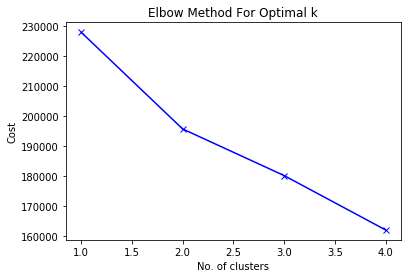

In [69]:
# Elbow curve to find optimal K
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(df4[list_var])
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [134]:
# Building the model with 3 clusters
kmode = KModes(n_clusters=2, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(df4[list_var])
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 14802, cost: 163480.0
Run 1, iteration: 2/100, moves: 3750, cost: 163480.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 11029, cost: 162739.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1643, cost: 166246.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 6751, cost: 172276.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 4115, cost: 165912.0
Best run was number 2


array([0, 0, 0, ..., 0, 1, 1], dtype=uint16)

In [135]:
df4.insert(0, "Cluster", clusters, True)
df4

,Cluster,ID_ORDER,DATE-ADD,TIME-ADD,HOUR,SEASON,P_MONTH,P_WEEK,COVID,CONFINEMENT,...,AREA,CLASS,TOTAL_QUANTITY,TOTAL_QUANTITY_SEGMENTS,TOTAL_TICKET,TICKET_VALUE,TOTAL_PRICE,TOTAL_REDUCTION,TOTAL_REDUCTION_PERCENT,REDUCTION_SEGMENTS
1,0,16264861,2018-01-01,2018-01-01 16:37:29,Late_afternoon,Winter,Start_of_Month,Start_of_Week,Pre-Covid,NON,...,urbaine,B,1,1 pièce,179.90,Entre 100 et 200 DT,179.9,0.00,0.000000,inférieure à 30%
4,0,35026890,2018-01-01,2018-01-01 16:07:20,Late_afternoon,Winter,Start_of_Month,Start_of_Week,Pre-Covid,NON,...,urbaine,C-,2,2 pièces,101.35,Entre 100 et 200 DT,133.8,32.45,24.252616,inférieure à 30%
5,0,35026887,2018-01-01,2018-01-01 15:56:47,Late_afternoon,Winter,Start_of_Month,Start_of_Week,Pre-Covid,NON,...,urbaine,C-,3,Entre 3 et 5 Pièces,244.80,Entre 200 et 300 DT,324.7,79.90,24.607330,inférieure à 30%
7,0,35026893,2018-01-01,2018-01-01 17:28:36,Late_afternoon,Winter,Start_of_Month,Start_of_Week,Pre-Covid,NON,...,urbaine,D,2,2 pièces,103.35,Entre 100 et 200 DT,137.8,34.45,25.000000,inférieure à 30%
9,1,68051664,2018-01-01,2018-01-01 18:53:00,Evening,Winter,Start_of_Month,Start_of_Week,Pre-Covid,NON,...,urbaine,B,3,Entre 3 et 5 Pièces,116.80,Entre 100 et 200 DT,173.7,56.90,32.757628,entre 30% et 50%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136924,0,44014786,2021-07-04,2021-07-04 15:57:16,Late_afternoon,Summer,Start_of_Month,Week_End,Post-Covid,NO,...,urbaine,C+,1,1 pièce,76.30,Inférieur à 100 DT,109.0,32.70,30.000000,inférieure à 30%
136926,0,60032965,2021-07-04,2021-07-04 13:15:30,Early_afternoon,Summer,Start_of_Month,Week_End,Post-Covid,NO,...,urbaine,C+,1,1 pièce,125.30,Entre 100 et 200 DT,179.0,53.70,30.000000,inférieure à 30%
136930,0,670067094,2021-07-04,2021-07-04 17:18:44,Late_afternoon,Summer,Start_of_Month,Week_End,Post-Covid,NO,...,urbaine,C+,2,2 pièces,92.26,Inférieur à 100 DT,131.8,39.54,30.000000,inférieure à 30%
136931,1,670067095,2021-07-04,2021-07-04 17:56:33,Late_afternoon,Summer,Start_of_Month,Week_End,Post-Covid,NO,...,urbaine,B,1,1 pièce,76.30,Inférieur à 100 DT,109.0,32.70,30.000000,inférieure à 30%


In [95]:
df4.drop(['Cluster'], axis=1)

,ID_ORDER,DATE-ADD,TIME-ADD,HOUR,SEASON,P_MONTH,P_WEEK,COVID,CONFINEMENT,CURFEW,...,AREA,CLASS,TOTAL_QUANTITY,TOTAL_QUANTITY_SEGMENTS,TOTAL_TICKET,TICKET_VALUE,TOTAL_PRICE,TOTAL_REDUCTION,TOTAL_REDUCTION_PERCENT,REDUCTION_SEGMENTS
1,16264861,2018-01-01,2018-01-01 16:37:29,Late_afternoon,Winter,Start_of_Month,Start_of_Week,Pre-Covid,NON,NON,...,urbaine,B,1,1 pièce,179.90,Entre 100 et 200 DT,179.9,0.00,0.000000,inférieure à 30%
4,35026890,2018-01-01,2018-01-01 16:07:20,Late_afternoon,Winter,Start_of_Month,Start_of_Week,Pre-Covid,NON,NON,...,urbaine,C-,2,2 pièces,101.35,Entre 100 et 200 DT,133.8,32.45,24.252616,inférieure à 30%
5,35026887,2018-01-01,2018-01-01 15:56:47,Late_afternoon,Winter,Start_of_Month,Start_of_Week,Pre-Covid,NON,NON,...,urbaine,C-,3,Entre 3 et 5 Pièces,244.80,Entre 200 et 300 DT,324.7,79.90,24.607330,inférieure à 30%
7,35026893,2018-01-01,2018-01-01 17:28:36,Late_afternoon,Winter,Start_of_Month,Start_of_Week,Pre-Covid,NON,NON,...,urbaine,D,2,2 pièces,103.35,Entre 100 et 200 DT,137.8,34.45,25.000000,inférieure à 30%
9,68051664,2018-01-01,2018-01-01 18:53:00,Evening,Winter,Start_of_Month,Start_of_Week,Pre-Covid,NON,NON,...,urbaine,B,3,Entre 3 et 5 Pièces,116.80,Entre 100 et 200 DT,173.7,56.90,32.757628,entre 30% et 50%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136927,640092596,2021-07-04,2021-07-04 18:47:07,Evening,Summer,Start_of_Month,Week_End,Post-Covid,NO,de 22h à 5h,...,urbaine,B,1,1 pièce,69.23,Inférieur à 100 DT,98.9,29.67,30.000000,inférieure à 30%
136930,670067094,2021-07-04,2021-07-04 17:18:44,Late_afternoon,Summer,Start_of_Month,Week_End,Post-Covid,NO,de 22h à 5h,...,urbaine,C+,2,2 pièces,92.26,Inférieur à 100 DT,131.8,39.54,30.000000,inférieure à 30%
136931,670067095,2021-07-04,2021-07-04 17:56:33,Late_afternoon,Summer,Start_of_Month,Week_End,Post-Covid,NO,de 22h à 5h,...,urbaine,B,1,1 pièce,76.30,Inférieur à 100 DT,109.0,32.70,30.000000,inférieure à 30%
136932,14156247,2021-07-04,2021-07-04 15:07:42,Late_afternoon,Summer,Start_of_Month,Week_End,Post-Covid,NO,de 22h à 5h,...,urbaine,C+,1,1 pièce,19.90,Inférieur à 100 DT,69.9,50.00,71.530758,plus que 50%


In [136]:
df4['Cluster'].value_counts()

0    37194
1    32055
Name: Cluster, dtype: int64

In [137]:
cluster_0 = df4[df4['Cluster'] == 0]
cluster_1 = df4[df4['Cluster'] == 1]


In [138]:
df4.to_excel(r'C:\Users\sofi\Desktop\clusterfemme.xlsx', index = False)

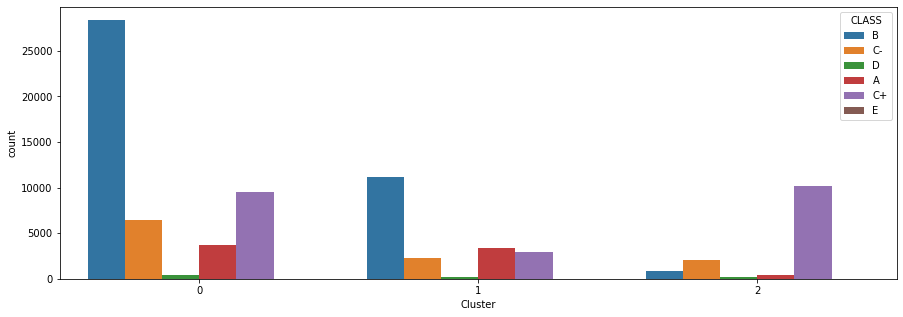

In [76]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df4['Cluster'],order=df4['Cluster'].value_counts().index,hue=df4['CLASS'])
plt.show()

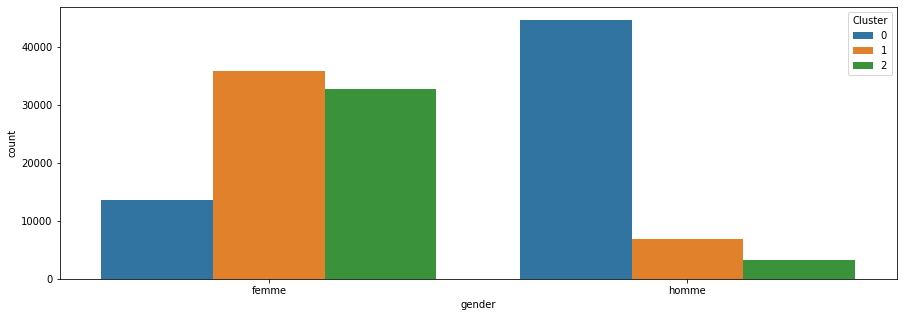

In [15]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df['gender'],order=df['gender'].value_counts().index,hue=df['Cluster'])
plt.show()

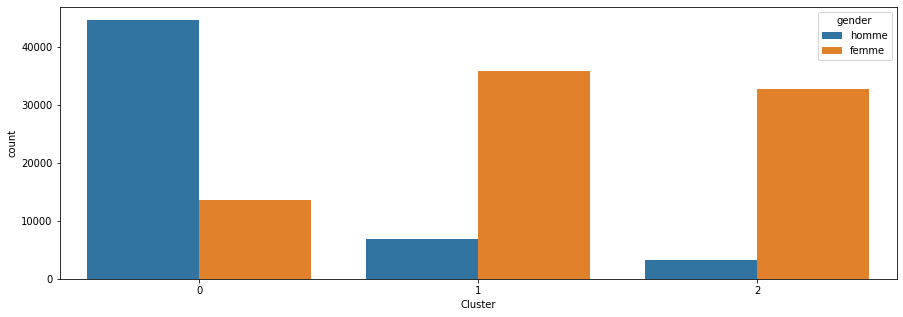

In [16]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df['Cluster'],order=df['Cluster'].value_counts().index,hue=df['gender'])
plt.show()

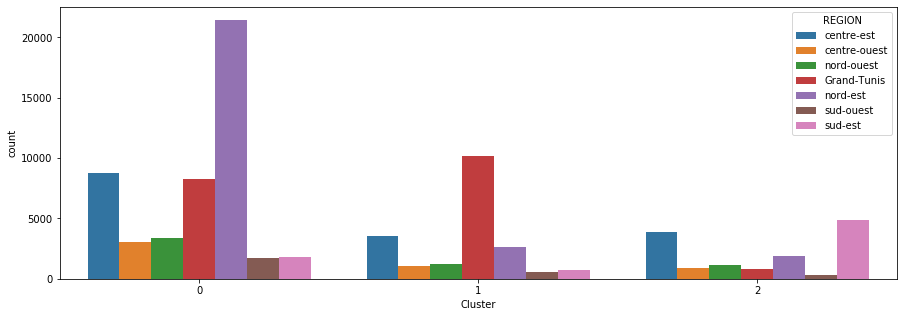

In [77]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df4['Cluster'],order=df4['Cluster'].value_counts().index,hue=df4['REGION'])
plt.show()

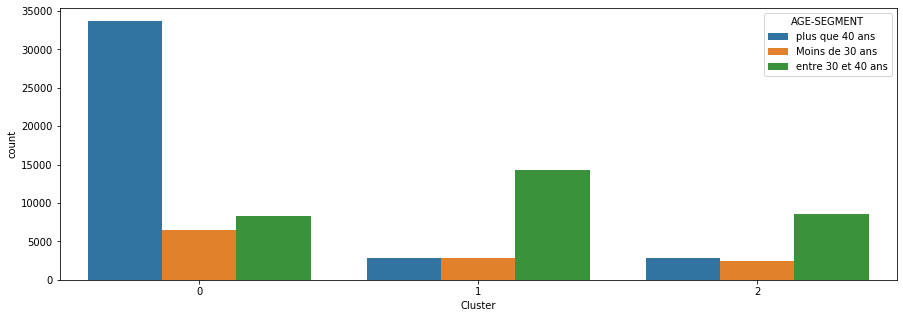

In [78]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df4['Cluster'],order=df4['Cluster'].value_counts().index,hue=df4['AGE-SEGMENT'])
plt.show()

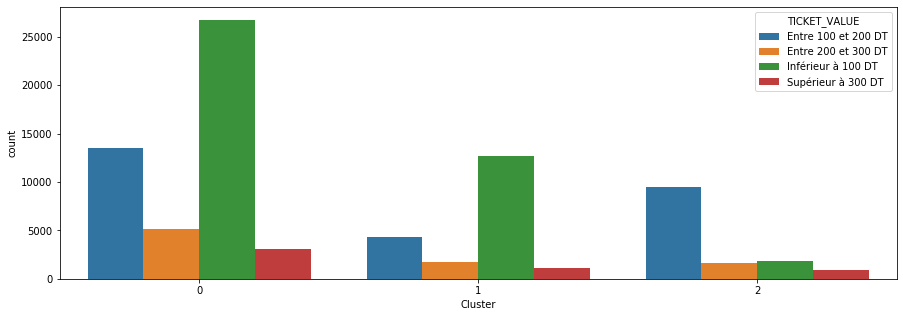

In [79]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df4['Cluster'],order=df4['Cluster'].value_counts().index,hue=df4['TICKET_VALUE'])
plt.show()

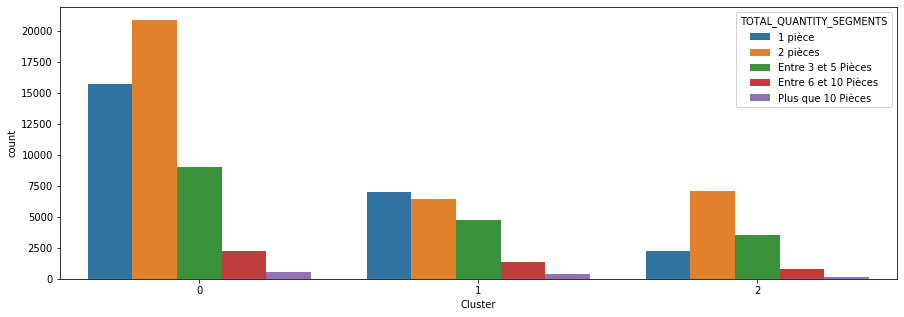

In [80]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df4['Cluster'],order=df4['Cluster'].value_counts().index,hue=df4['TOTAL_QUANTITY_SEGMENTS'])
plt.show()

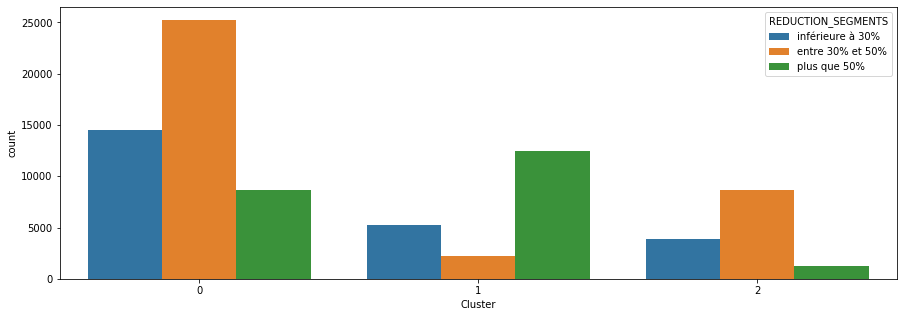

In [81]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df4['Cluster'],order=df4['Cluster'].value_counts().index,hue=df4['REDUCTION_SEGMENTS'])
plt.show()

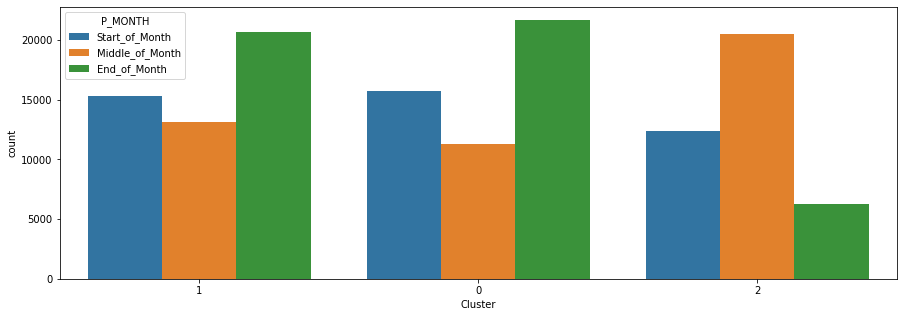

In [27]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df['Cluster'],order=df['Cluster'].value_counts().index,hue=df['P_MONTH'])
plt.show()

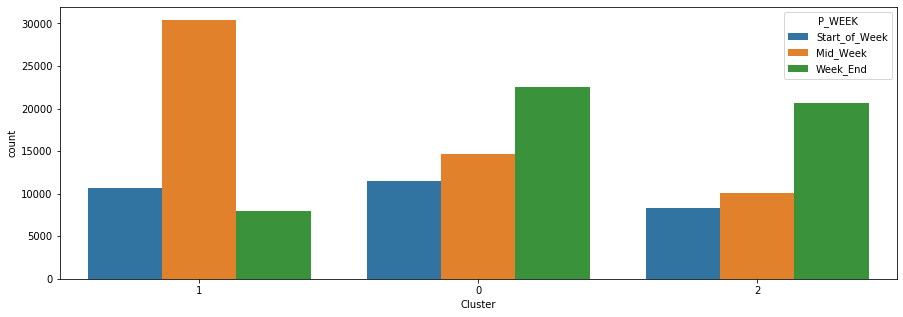

In [28]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df['Cluster'],order=df['Cluster'].value_counts().index,hue=df['P_WEEK'])
plt.show()

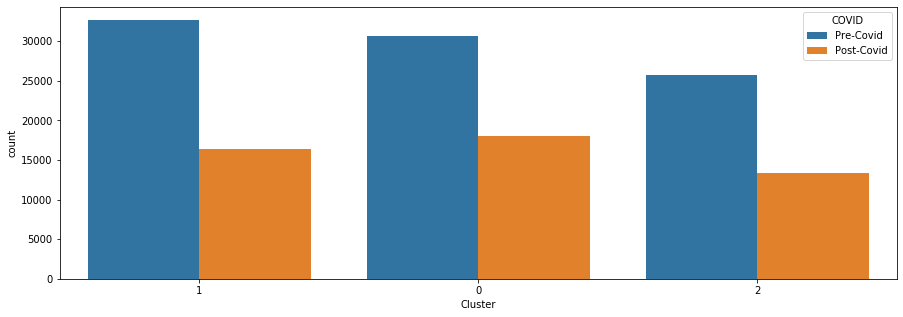

In [29]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df['Cluster'],order=df['Cluster'].value_counts().index,hue=df['COVID'])
plt.show()

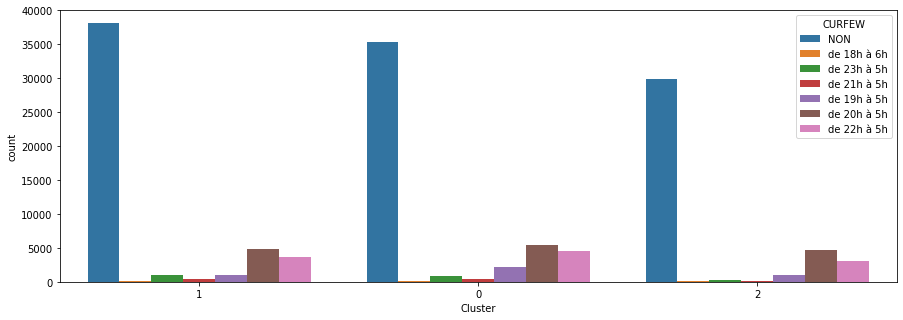

In [30]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df['Cluster'],order=df['Cluster'].value_counts().index,hue=df['CURFEW'])
plt.show()

In [24]:
df['CONFINEMENT'].value_counts()

NON    84146
NO     52514
YES      274
Name: CONFINEMENT, dtype: int64